11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
188/188 [==============================] - 4s 15ms/step - loss: 0.0772 - val_loss: 0.0469
Epoch 2/50
188/188 [==============================] - 2s 11ms/step - loss: 0.0401 - val_loss: 0.0343
Epoch 3/50
188/188 [==============================] - 3s 13ms/step - loss: 0.0310 - val_loss: 0.0275
Epoch 4/50
188/188 [==============================] - 2s 12ms/step - loss: 0.0255 - val_loss: 0.0232
Epoch 5/50
188/188 [==============================] - 3s 17ms/step - loss: 0.0214 - val_loss: 0.0196
Epoch 6/50
188/188 [==============================] - 2s 12ms/step - loss: 0.0185 - val_loss: 0.0173
Epoch 7/50
188/188 [==============================] - 2s 9ms/step - loss: 0.0165 - val_loss: 0.0155
Epoch 8/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0149 - val_loss: 0.0143
Epoch 9/50
188/188 [==============================] - 1s 6ms/step - loss: 0.0138 - val_loss: 0.0133
Epoch 10/50
188/188 [========

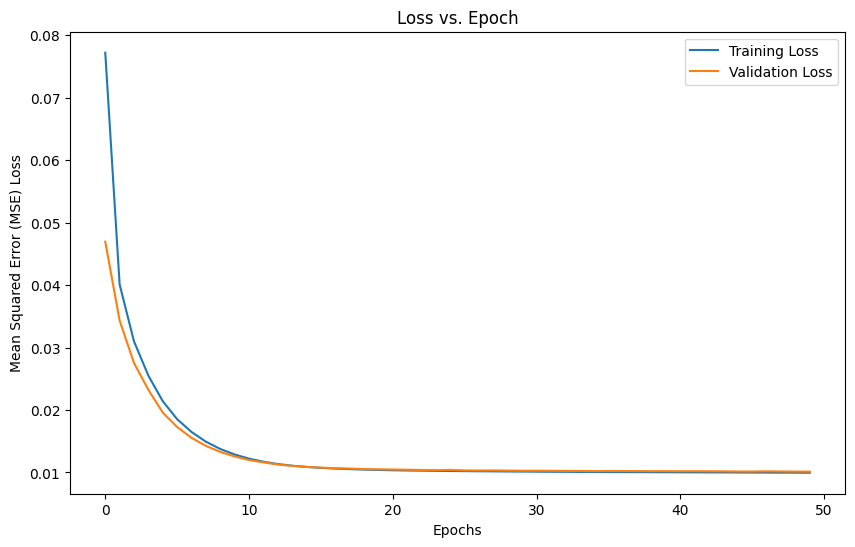

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images as flattened vectors
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 32  # Size of the encoded representation

input_img = Input(shape=(784,))  # Input layer
encoded = Dense(encoding_dim, activation='relu')(input_img)  # Encoder
decoded = Dense(784, activation='sigmoid')(encoded)  # Decoder

autoencoder = Model(input_img, decoded)  # Autoencoder model

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_split=0.2)

# Plot the loss vs. epoch curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE) Loss')
plt.legend()
plt.title('Loss vs. Epoch')
plt.show()
